# 0. About

This notebook is about checking out the **Linear Model-based Feature Selection**.

The detail can be found here: 
https://scikit-learn.org/stable/modules/feature_selection.html#l1-based-feature-selection

In [1]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot as plt

# 1. Check Dataset

We can use the iris dataset: [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html), where the type of iris can be predicted, given sepal length, sepal width, petal length, and petal width.

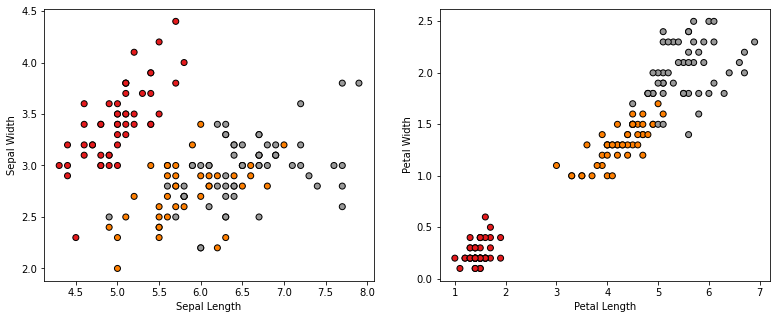

In [2]:
X, y = load_iris(return_X_y=True)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Plot the training points
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")
axes[1].scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor="k")
axes[1].set_xlabel("Petal Length")
axes[1].set_ylabel("Petal Width");

# 2. Training with All Features

In [3]:
lsvc_obj = LinearSVC(C=0.01, penalty='l1', dual=False, random_state=37, max_iter=1e5).fit(X, y)
print(lsvc_obj.coef_)

[[ 0.          0.21704158 -0.28758457  0.        ]
 [ 0.         -0.09200224  0.          0.        ]
 [-0.02511402 -0.18218505  0.12933069  0.        ]]


In [4]:
# check 5-fold cross-validation
lsvc_obj = LinearSVC(C=0.01, penalty='l1', dual=False, random_state=37, max_iter=1e5)
cv_result = cross_validate(lsvc_obj, X, y)
print('cross-validation test score:')
print(cv_result['test_score'])

cross-validation test score:
[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]


# 3. Feature Selection

In [5]:
lsvc_obj = LinearSVC(C=0.01, penalty='l1', dual=False, random_state=37, max_iter=1e5).fit(X, y)
model = SelectFromModel(lsvc_obj, prefit=True)
X_new = model.transform(X)
print('feature selected:')
print(model.get_support())

feature selected:
[ True  True  True False]


In [6]:
# check 5-fold cross-validation
lsvc_obj = LinearSVC(C=0.01, penalty='l1', dual=False, random_state=37, max_iter=1e5)
cv_result = cross_validate(lsvc_obj, X_new, y)
print('cross-validation test score:')
print(cv_result['test_score'])

cross-validation test score:
[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
